# EDA-Visualisation: Heatmap Day Hour 

## Import Modules

In [3]:
import seaborn as sns

## Prepare Data

In [4]:
# https://github.com/mwaskom/seaborn-data/blob/master/taxis.csv
df = sns.load_dataset("taxis")
df.sample(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
1282,2019-03-25 18:12:38,2019-03-25 18:18:19,1,0.73,5.5,1.96,0.0,11.76,yellow,credit card,Union Sq,Murray Hill,Manhattan,Manhattan
4217,2019-03-14 16:01:29,2019-03-14 16:17:17,6,2.01,11.5,2.37,0.0,18.17,yellow,credit card,Clinton East,Gramercy,Manhattan,Manhattan
1341,2019-03-09 19:43:50,2019-03-09 20:46:12,1,7.06,39.0,4.00,0.0,46.30,yellow,credit card,Williamsburg (South Side),Clinton West,Brooklyn,Manhattan


### Copy what we need and expand the data

In [5]:
df = df[["dropoff"]]
df['hour'] = df['dropoff'].dt.hour
df['weekday_index'] = df['dropoff'].dt.dayofweek  # (0=Monday, 6=Sunday)
df['weekday_name'] = df['dropoff'].dt.day_name()
df.sample(3)

,dropoff,hour,weekday_index,weekday_name
5900,2019-03-14 01:49:58,1,3,Thursday
5637,2019-03-21 20:21:46,20,3,Thursday
2254,2019-03-03 18:39:57,18,6,Sunday


<Axes: xlabel='day', ylabel='hour'>

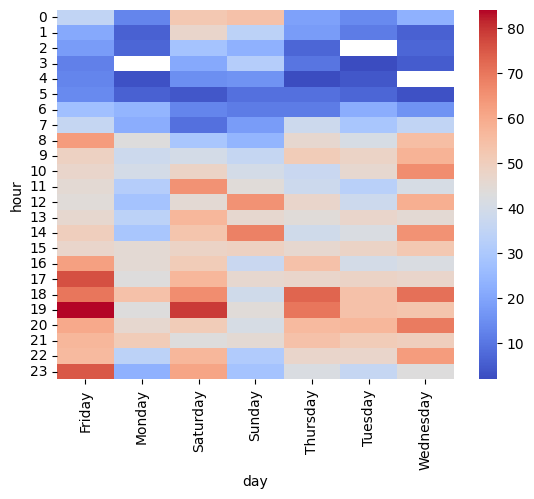

In [6]:
sns.heatmap(df.groupby([df.weekday_name, df.hour])
   ['dropoff'].count()
   .rename_axis(index=['day','hour'])
   .unstack(level=0),
    cmap="coolwarm"
)